### Objectives -

#### Perform EDA
1. Before inferring anything from the data need treat Outliers and Missing values of data.
2. Indentify the duplicates and missing values and treat them.

#### Data Visulzation
1. Create appropriate visulization to indentify most ordered products and revenue

#### Market Basket Analysis
1. Using the simple matrix of product_category_name in columns and rows identify associated combinantions using the apriori association rule.

### 1. Perform EDA

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import the dataset

#### Cleaning Orders table

In [2]:
orders = pd.read_excel('Retail_dataset.xlsx', sheet_name='orders')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [3]:
# check the shape of orders
orders.shape

(99441, 7)

In [4]:
# Check unique order id
orders.order_id.duplicated().sum()

0

In [5]:
# Check unique of customer_id
orders.customer_id.value_counts().sort_values(ascending=False)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
88e177ee7be84f7835294d1440dea968     1
1782775b0a11be431aafa0abdd0cc74f     1
a5982542cc06d3bc21523d2396064840     1
75d441e15d55741e935e018e42adca06     1
d0b453cf64250349d52859b9b95d4a6c     1
Name: customer_id, Length: 96096, dtype: int64

In [6]:
len(orders.customer_id.value_counts().sort_values(ascending=False))

96096

#### We have to analyse the delivered orders 

In [7]:
orders.order_status.value_counts().sort_values(ascending=False)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [8]:
orders = orders[orders.order_status=='delivered']
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


As we required only delivered orders for Market Basket Analysis.

In [9]:
orders.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [10]:
orders.shape

(96478, 7)

In [11]:
# Now Check the missing values in orders
orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [12]:
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace=True)
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

Check NAN values in orders table found that 2 columns has NAN values and these values imputed by the values of column names 'order_purchase_timestamp' to 'order_approved_at' and 'order_estimated_delivery_date' to 'order_delivered_timestamp'.

In [13]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [14]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### Cleaning Orders Items Table

In [15]:
# Import order_items sheet
order_items = pd.read_excel('Retail_dataset.xlsx', sheet_name='order_items')
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [16]:
order_items.shape

(112650, 6)

In [17]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges'],
      dtype='object')

In [18]:
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### Cleaning Customer Table

In [19]:
customers = pd.read_excel('Retail_dataset.xlsx', sheet_name='customers')
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
customers.shape

(99441, 4)

In [21]:
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [22]:
customers.customer_id.duplicated().sum()

3345

In [23]:
customers[customers.customer_id.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [24]:
customers[customers.customer_id.duplicated()].shape

(3345, 4)

In [25]:
customers.shape

(99441, 4)

In [26]:
customers.drop_duplicates(subset='customer_id',keep='first')

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [27]:
customers.drop_duplicates(subset='customer_id',keep='first', inplace=True)
customers[customers.customer_id.duplicated()].shape

(0, 4)

Customer_id column has 3345 nos duplicate id. We removed duplicated customer_id. 

#### Cleaning Payments Table

In [28]:
payments = pd.read_excel('Retail_dataset.xlsx', sheet_name='payments')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
payments.shape

(103886, 5)

In [30]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Import the product sheet and clean

In [31]:
products = pd.read_excel('Retail_dataset.xlsx', sheet_name='products')
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [32]:
products.shape


(32951, 6)

In [33]:
products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [34]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
home_comfort_2                           1
security_and_services                    1
diapers_and_hygiene                      1
furniture_mattress_and_upholstery        1
Name: product_category_name, Length: 70, dtype: int64

In [35]:
products.product_category_name.value_counts(normalize=True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
home_comfort_2                        0.003051
security_and_services                 0.003051
diapers_and_hygiene                   0.003051
furniture_mattress_and_upholstery     0.003051
Name: product_category_name, Length: 70, dtype: float64

In [36]:
products.product_category_name.mode()

0    toys
dtype: object

In [37]:
products.product_category_name.mode()[0]

'toys'

In [38]:
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)
products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [40]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


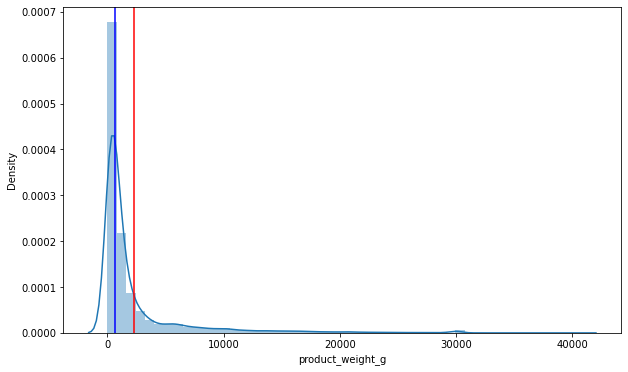

In [41]:
# Check the distplot of product_weight_g
plt.figure(figsize=(10,6))
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(),color='r')
plt.axvline(products.product_weight_g.median(),color='b')
plt.show()

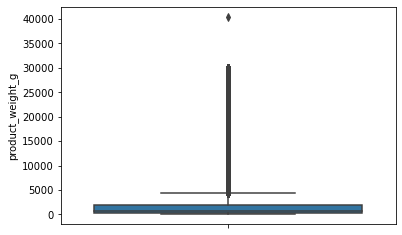

In [42]:
# Check the boxplot of product_weight_g
sns.boxplot(y=products.product_weight_g)
plt.show()

In [43]:
products.product_weight_g.median()

700.0

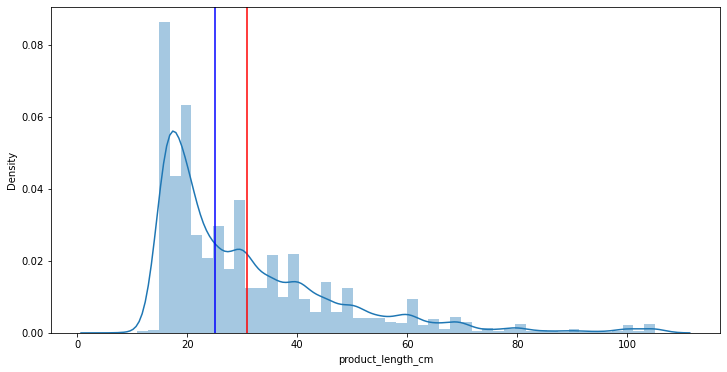

In [44]:
# Check the distplot of product_length_cm
plt.figure(figsize=(12,6))
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(),color='r')
plt.axvline(products.product_length_cm.median(),color='b')
plt.show()

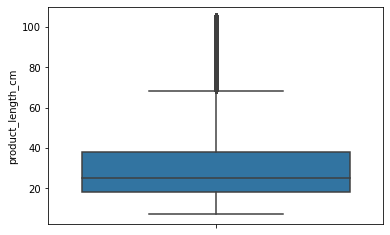

In [45]:
# Check the boxplot of product_length_cm
sns.boxplot(y=products.product_length_cm)
plt.show()

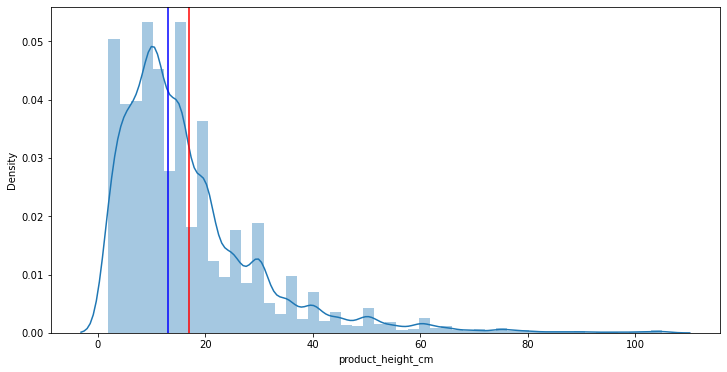

In [46]:
# Check the distplot of product_height_cm
plt.figure(figsize=(12,6))
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(),color='r')
plt.axvline(products.product_height_cm.median(),color='b')
plt.show()

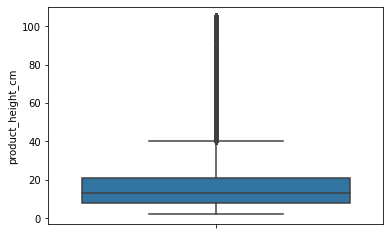

In [47]:
# Check the boxplot of product_height_cm
sns.boxplot(y=products.product_height_cm)
plt.show()

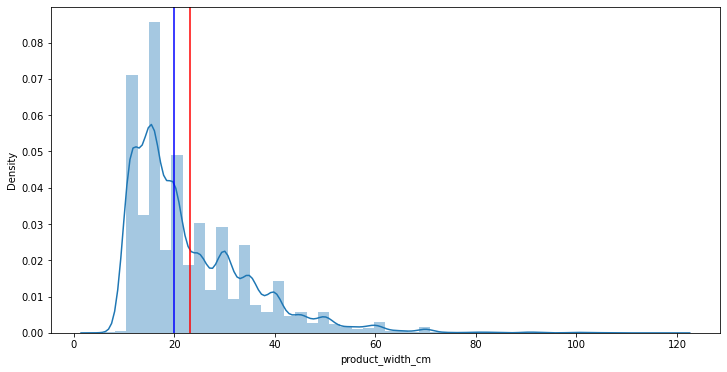

In [48]:
# Check the distplot of product_width_cm
plt.figure(figsize=(12,6))
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(),color='r')
plt.axvline(products.product_width_cm.median(),color='b')
plt.show()

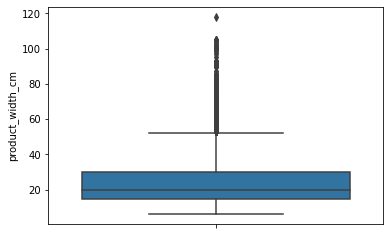

In [49]:
# check boxplot of product_width_cm
sns.boxplot(y=products.product_width_cm)
plt.show()

We checked all missing value columns and all data columns are skewed. We are going replace missing values with the median value of that columns.

In [50]:
products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)

In [51]:
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [52]:
with pd.ExcelWriter('D:\Capstone\Cleaned_Retail_Dataset.xlsx') as writer:
    orders.to_excel(writer,sheet_name='Orders',index=False)
    order_items.to_excel(writer,sheet_name="Order_items",index=False)
    customers.to_excel(writer,sheet_name='Customers',index=False)
    payments.to_excel(writer,sheet_name='Payments',index=False)
    products.to_excel(writer,sheet_name='Products',index=False)
print('Suceessful')

Suceessful


#### Prepare the data for Market_Basket_analysis

In [53]:
df = pd.merge(order_items,products)
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0


In [54]:
df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0


In [55]:
df.shape

(112650, 11)

In [56]:
df.isnull().sum()

order_id                 0
order_item_id            0
product_id               0
seller_id                0
price                    0
shipping_charges         0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [57]:
#df1 = df[df.order_item_id>5]

In [58]:
#df1.head()

In [59]:
#df1.shape

In [60]:
MBA = pd.pivot_table(data=df, index = 'order_id', columns="product_category_name", values='order_item_id',aggfunc='sum',fill_value=0)
MBA

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
# Install mlxtend library
! pip install mlxtend

In [62]:
# Import apriori and association_rules from mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [63]:
MBA.shape

(98666, 70)

In [64]:
MBA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 70 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   agro_industry_and_commerce               98666 non-null  int64
 1   air_conditioning                         98666 non-null  int64
 2   art                                      98666 non-null  int64
 3   arts_and_craftmanship                    98666 non-null  int64
 4   audio                                    98666 non-null  int64
 5   auto                                     98666 non-null  int64
 6   baby                                     98666 non-null  int64
 7   bed_bath_table                           98666 non-null  int64
 8   books_general_interest                   98666 non-null  int64
 9   books_imported                           98666 non-null  int64
 10  books_technical  

In [65]:
len(MBA)

98666

In [66]:
MBA['air_conditioning'].value_counts()

0     98584
1        73
3         8
28        1
Name: air_conditioning, dtype: int64

In [67]:
# We did not require sum only required product is purchased or not
# convert purchased products to 1 else mark as 0

def Convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [68]:
MBA_sets = MBA.applymap(Convert_into_binary)

In [69]:
# Check data is converted to 1 and 0
MBA_sets['air_conditioning'].value_counts()

0    98584
1       82
Name: air_conditioning, dtype: int64

In [70]:
pd.set_option('display.max_columns',100)

In [71]:
MBA_sets

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
# Remove postage items as it is just seal almonst in all transanctions
# print(MBA_sets['POSTAGE'].head())
# MBA_sets.drop(columns=['POSTAGE'],inplace=True)

In [73]:
MBA_sets= MBA_sets[(MBA_sets>0).sum(axis=1)>=2]
MBA_sets

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff632bc583a94f23c59db4cbaa0ba2ab,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ffa466d3e55f98477b7e0da764df3c6c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ffb9a9cd00c74c11c24aa30b3d78e03b,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [74]:
MBA_sets.shape

(1303, 70)

In [75]:
MBA_sets.columns

Index(['agro_industry_and_commerce', 'air_conditioning', 'art',
       'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table',
       'books_general_interest', 'books_imported', 'books_technical',
       'christmas_supplies', 'cine_photo', 'computers',
       'computers_accessories', 'consoles_games',
       'construction_tools_construction', 'construction_tools_lights',
       'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden',
       'costruction_tools_tools', 'diapers_and_hygiene', 'drinks',
       'dvds_blu_ray', 'electronics', 'fashio_female_clothing',
       'fashion_bags_accessories', 'fashion_childrens_clothes',
       'fashion_male_clothing', 'fashion_shoes', 'fashion_sport',
       'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food',
       'food_drink', 'furniture_bedroom', 'furniture_decor',
       'furniture_living_room', 'furniture_mattress_and_upholstery',
       'garden_tools', 'health_beauty', 'home_appliances', 'home_applianc

In [76]:
# Call Apriori function with minimum support of 0.01%
# 
frequent_itemsets = apriori(MBA_sets, min_support = 0.01, use_colnames=True)

In [77]:
frequent_itemsets

,support,itemsets
0,0.031466,(auto)
1,0.019186,(baby)
2,0.229470,(bed_bath_table)
3,0.083653,(computers_accessories)
4,0.021489,(cool_stuff)
5,0.033001,(fashion_bags_accessories)
6,0.127398,(furniture_decor)
7,0.041443,(garden_tools)
8,0.067536,(health_beauty)
9,0.052955,(housewares)


In [87]:
# We would apply association rules on frequent itemset. 
# here we are setting based on support and keeping minimum support as 0.001
rules_mlxtend = association_rules(frequent_itemsets, metric='support', min_threshold=0.01)
rules_mlxtend.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(auto),0.971604,0.031466,0.030698,0.031596,1.004123,0.000126,1.000134
1,(auto),(toys),0.031466,0.971604,0.030698,0.975610,1.004123,0.000126,1.164236
2,(toys),(baby),0.971604,0.019186,0.016117,0.016588,0.864550,-0.002525,0.997357
3,(baby),(toys),0.019186,0.971604,0.016117,0.840000,0.864550,-0.002525,0.177475
4,(toys),(bed_bath_table),0.971604,0.229470,0.225633,0.232227,1.012015,0.002679,1.003591


#### Running Association Rule

In [86]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.9 )
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031466,0.971604,0.030698,0.975610,1.004123,0.000126,1.164236
1,(bed_bath_table),(toys),0.229470,0.971604,0.225633,0.983278,1.012015,0.002679,1.698081
2,(computers_accessories),(toys),0.083653,0.971604,0.079816,0.954128,0.982014,-0.001462,0.619033
3,(fashion_bags_accessories),(toys),0.033001,0.971604,0.032233,0.976744,1.005290,0.000170,1.221028
4,(furniture_decor),(toys),0.127398,0.971604,0.119724,0.939759,0.967224,-0.004057,0.471374
5,(health_beauty),(toys),0.067536,0.971604,0.064467,0.954545,0.982443,-0.001152,0.624712
6,(housewares),(toys),0.052955,0.971604,0.048350,0.913043,0.939728,-0.003101,0.326554
7,(office_furniture),(toys),0.014582,0.971604,0.013814,0.947368,0.975056,-0.000353,0.539524
8,(perfumery),(toys),0.025326,0.971604,0.024559,0.969697,0.998037,-0.000048,0.937068
9,(pet_shop),(toys),0.018419,0.971604,0.017652,0.958333,0.986341,-0.000244,0.681504


In [80]:
# Select the association rules over lift = 1
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(toys),(auto),0.971604,0.031466,0.030698,0.031596,1.004123,0.000126,1.000134
1,(auto),(toys),0.031466,0.971604,0.030698,0.975610,1.004123,0.000126,1.164236
2,(toys),(bed_bath_table),0.971604,0.229470,0.225633,0.232227,1.012015,0.002679,1.003591
3,(bed_bath_table),(toys),0.229470,0.971604,0.225633,0.983278,1.012015,0.002679,1.698081
4,(toys),(fashion_bags_accessories),0.971604,0.033001,0.032233,0.033175,1.005290,0.000170,1.000181
5,(fashion_bags_accessories),(toys),0.033001,0.971604,0.032233,0.976744,1.005290,0.000170,1.221028
6,(toys),(stationery),0.971604,0.023791,0.023791,0.024487,1.029226,0.000676,1.000713
7,(stationery),(toys),0.023791,0.971604,0.023791,1.000000,1.029226,0.000676,inf
8,(toys),(telephony),0.971604,0.024559,0.024559,0.025276,1.029226,0.000697,1.000736
9,(telephony),(toys),0.024559,0.971604,0.024559,1.000000,1.029226,0.000697,inf


In [88]:
# select the rules over levarage higher than 0
rules = rules[rules['leverage']>=0.0]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031466,0.971604,0.030698,0.975610,1.004123,0.000126,1.164236
1,(bed_bath_table),(toys),0.229470,0.971604,0.225633,0.983278,1.012015,0.002679,1.698081
3,(fashion_bags_accessories),(toys),0.033001,0.971604,0.032233,0.976744,1.005290,0.000170,1.221028
10,(stationery),(toys),0.023791,0.971604,0.023791,1.000000,1.029226,0.000676,inf
11,(telephony),(toys),0.024559,0.971604,0.024559,1.000000,1.029226,0.000697,inf
12,(watches_gifts),(toys),0.057559,0.971604,0.056025,0.973333,1.001780,0.000100,1.064850
